# Inversion method

Probability integral transform is useful in statistics for checking goodness of fit of a distribution to a set of data while the inverse method is used for simulation.

## 1. **Probability integral transfrom**

🔴 For GOODNESS OF FIT 🔴

Data values that are modeled on being R.V. from any given distribution can be converted to a R.V. having uniform distribution. Let $X \sim F_X(x)$ define a transformation where $Y = F_X(X) \in [0,1]$. So, $X = F_X^{-1}(y)$, then $Y$ is uniform over $[0,1]$, i.e. $Y \sim Unif(0,1)$.

This result can be summarized as:

**Theorem:** if X has CDF F, then F(x) has unif(0,1) distribution.

**Proof:**

$$F_y(y) = P(Y<=y) = P(F_x(x) <= y) = P(x <= F_x^{-1}(y)) = F_x(F_x^{-1}(y)) = y$$

So, $F_y(y) = P(Y<=y) = y$, then $Y \sim Unif(0,1)$.

## 2. **Inverse probability integral transform**

🔴 For SIMULATION OF R.V.🔴

Here, we start from $Unif(0,1)$ and going to $Y = F_X(x)$. This is helpful because it's easy to get a $Unif(0,1)$. From here, you can get a more complicated solution.

*Start from the uniform distribution and do the inverse procedure*

**Theorem:** suppose $X \sim U(0,1)$, i.e. $F_X(x) = x$, $\forall x \in [0,1]$. Let $Y = F^{-1}(x)$, then $X = F(y)$, where $F(\cdot)$ is a non-decreasing absolutely continuous function, then $Y$ has the CDF corresponding to $F$.

**Proof:**

Need to prove that $F_Y(y) = F(y)$.

$$F_Y(y) = P(Y <= y) = P(F^{-1}(x) <= y) = P(x <= F(y)) = F(y)$$


## **Inversion method**

Suppose we want to simulate $X$ whose distribution has a given CDF, $F$. If $F$ is continuous and strictly increasing, then $F^{-1}$ exists. Now, sampling $U \sim Unif(0,1)$ and setting $X = F^{-1}(u)$ does the job. This means that if $X$ has CDF $F$, then $F^{-1}(u)$ will have CDF $F$, so if you are able to calculate $F^{-1}$, and can gather uniform, then you can generate a sample from $F$.

### Example 1: Generate a random sample of a distribution with $F(x) = x / (1 + x)$.

To get F^{-1}(y), specify a value for y and solve for x.  

$$y = x / (1 + x)$$

$$x = y / (1 - y)$$

So, $F^{-1}(y) = y / (1 - y)$. This means that $u / (1 - u)$ will have CDF $F$. Therefore, the algorithm is:

1. Generate uniform distribution, $ U \sim Unif(0,1)$

2. Set $x = u / (1 - u)$

3. Conduct this multiple times to sample the distribution


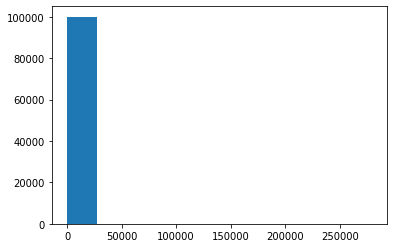

In [17]:
import numpy as np
import matplotlib.pyplot as plt

u = np.random.uniform(0, 1, 100000)

# samples
samples = u / (1 - u)

plt.hist(samples)
plt.show()

### Example 2: Generate random sample of exponential distribution with rate $\lambda$

We know $f(x) = \lambda \exp{-\lambda x}$ where $x \geq 0$. Therefore, $F(x) = 1 - \exp{-\lambda x}$.

To calculate $F^{-1}(y), specify a value for $y$ and solve for $x$.

$$y = 1 - \exp{- \lambda x}$$

$$x = \frac{-1}{\lambda} \log (1 - y)$$

Therefore, $x = F^{-1}(y) = - \frac{1}{\lambda} \log (1 - y)$.

This means that if $U \in [0,1]$, then $F^{-1}(U) = -\frac{1}{\lambda} \log (1 - U) \sim Exp(\lambda)$

To generate samples, 

1. Sample $U \sim Unif(0,1)$

2. Set $x = -\frac{1}{\lambda} \log(1 - u)$



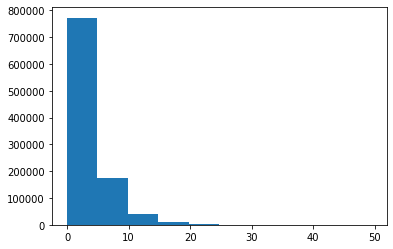

In [15]:
import numpy as np
import matplotlib.pyplot as plt

u = np.random.uniform(0, 1, 1000000)

lambd = 0.3

# samples
samples =- (1 / lambd) * np.log(1 - u)

plt.hist(samples)
plt.show()

### Example 3: Generate random sample of the (standard) normal distribution

We know $f(x) = \frac{1}{\sqrt{2\pi}} \exp{ - \frac{x^2}{2} }$, where $-\infty < x < \infty$

The CDF $F(x)$ does not have a closed form. 

$$\Phi (x) = \int_{-\int}^x \frac{1}{\sqrt{2\pi}} \exp{ - \frac{x^2}{2} } dx$$

In many cases, you cannot invert the CDF (i.e. normal distribution, t-distribution)

A normal R.V. can, in principle, can be generated using the inversion method. However, this requires evaluations of the standard normal inverse CDF, which is a non-trivial calculation. There [are ways](https://stats.stackexchange.com/questions/16334/how-to-sample-from-a-normal-distribution-with-known-mean-and-variance-using-a-co) of sampling this distribution.

## 3. Transformation Methods

This is the case where distribution $F$ is linked in a simple way to another distribution easy to simulate.

### Sampling normal RVs

There are a number of fast and efficient alternatives for generating normal RVs. 

#### **Box-Muller algorithm**

![box-muller](_static//box-muller.png)

Box-Muller is based on some trigonometric transformations.

This method generates a pair of normal RVs $X$ and $Y$. Let $X \sim N(0,1)$ and $Y \sim N(0,1)$ be independent. Box-Muller sampling is based on representing the joint distribution of 2 independent standard normal variables in polar coordinates. The joint distribtion $p(x,y)$ which is circular-symmetric is 

$$p(x,y) = p(x) \times p(y) = (\frac{1}{\sqrt{2\pi}} \exp{ -\frac{x^2}{2} })(\frac{1}{\sqrt{2\pi}} \exp{ -\frac{y^2}{2} })$$

$$ = \frac{1}{2\pi} \exp{ - (x^2 + y^2) / 2} = \frac{1}{2\pi} \exp{ -r^2 / 2}$$

where $r^2 = x^2 + y^2$. Therefore, 

$$p(r, \theta) = \frac{1}{2\pi} \exp{ -r^2 / 2 }$$

is the joint density of $r^2 \sim \chi_2^2$ (or $\exp{ 1/2}$) and $\theta \sim Unif(0, 2\pi)$.

This is because: $x^2 \sim \chi_1^2$, $y^2 \sim \chi_1^2$, x and y are independent. Therefore, $x^2 + y^2 \sim \chi_2^2$

It follows that normal RVs can be generated from $\chi^2$ and uniform. 

If $X \sim N(0,1)$, $Y \sim N(0,1)$ and independent, then 

$$X^2 + Y^2 = -2 \log{ U_1} \sim \chi_2^2$$

where $U_1 \sim Unif(0,1)$.

$- \log {x}$ comes from the inverse of the exponential distribution.

#### Question: Given that $x^2 + y^2 = -2 \log{U_1}$, how do we find X and Y?

Define $\theta$ as a random angle between $X$ and $r$ where $r^2 = x^2 + y^2$. Then, $\theta \sim Unif(0, 2\pi)$.

![box-muller-coordinates](_static//box_muller_coordinates.png)

$$x = r \cos \theta = \sqrt{ -2 \log U_1 } \cos (2\pi U_2)$$

$$y = r \sin \theta = \sqrt{ -2 \log U_1 } \sin (2\pi U_2)$$

where $U_2 = \frac{\theta}{2\pi} \sim Unif(0,1)$ because as we stated above, $\theta \sim Unif(0, 2\pi)$.


**Justification**: Let $x^2 + y^2 = -2 \log U_1$. Therefore, $u_1 = \exp{ -\frac{x^2+y^2}{2} }$. 

$$\tan (2\pi U_2) = Y / X $$

$$U_2 = \frac{1}{2\pi} tan^{-1} (Y/X)$$

The Jacobian of the polar transformation is 

$$| \frac{\delta (u_1, u_2)}{\delta{x,y}}| = \frac{1}{2\pi} \exp { - \frac{x^2 + y^2}{2}}$$

By the formulat for the random vairable transformation, we have

$$f(x,y) = f(u_1, u_2) | \frac{\delta (u_1, u_2)}{\delta{x,y}}| = \frac{1}{2\pi} \exp {-\frac{1}{2} (x^2 + y^2)}$$

Hence, $X$ and $Y$ are independent N(0,1).


**We want to generate a random normal sample. To do this, we simply **

1. Sample $U \sim Unif(0,1)$ and $V \sim Unif(0,1)$

2. Set $x = r \cos \theta = \sqrt{ -2 \log U } \cos (2\pi V)$ and $x = r \cos \theta = \sqrt{ -2 \log U } \sin (2\pi V)$

3. Take a linear function to get different mean and variance ($\mu$, $\sigma$)


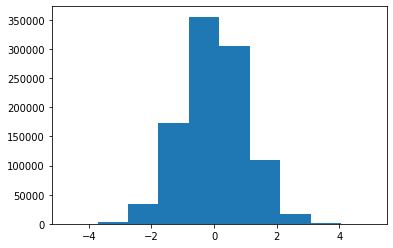

In [14]:
import numpy as np
import matplotlib.pyplot as plt

u = np.random.uniform(0,1,1000000)
v = np.random.uniform(0,1,1000000)

samples = np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * v)

plt.hist(samples)
plt.show()

To get a normal distribution, simply evaluate $x = \mu + z \sigma \sim N(\mu, \sigma)$.